In [2]:
!pip install --ignore-installed --upgrade tensorflow==1.15

     |████████████████████████████████| 412.3 MB 22 kB/s 
     |████████████████████████████████| 75 kB 3.7 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 126 kB 62.0 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 4.3 MB 27.2 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 1.0 MB 10.7 MB/s 
     |████████████████████████████████| 3.8 MB 28.7 MB/s 
     |████████████████████████████████| 15.7 MB 47.9 MB/s 
     |████████████████████████████████| 503 kB 54.9 MB/s 
     |████████████████████████████████| 4.1 MB 42.3 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.6 MB/s 
     |████████████████████████████████| 224 kB 58.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=554

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
train = pd.read_csv('/content/train.csv', index_col='Id')
test = pd.read_csv('/content/test.csv', index_col='Id')
submission = pd.read_csv('/content/sample_submission.csv', index_col='Id')
data = train

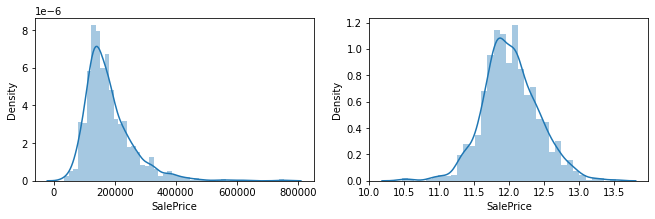

In [62]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(11,3)
sns.distplot(train['SalePrice'], ax=ax1)
sns.distplot(np.log(train['SalePrice']+1), ax=ax2)

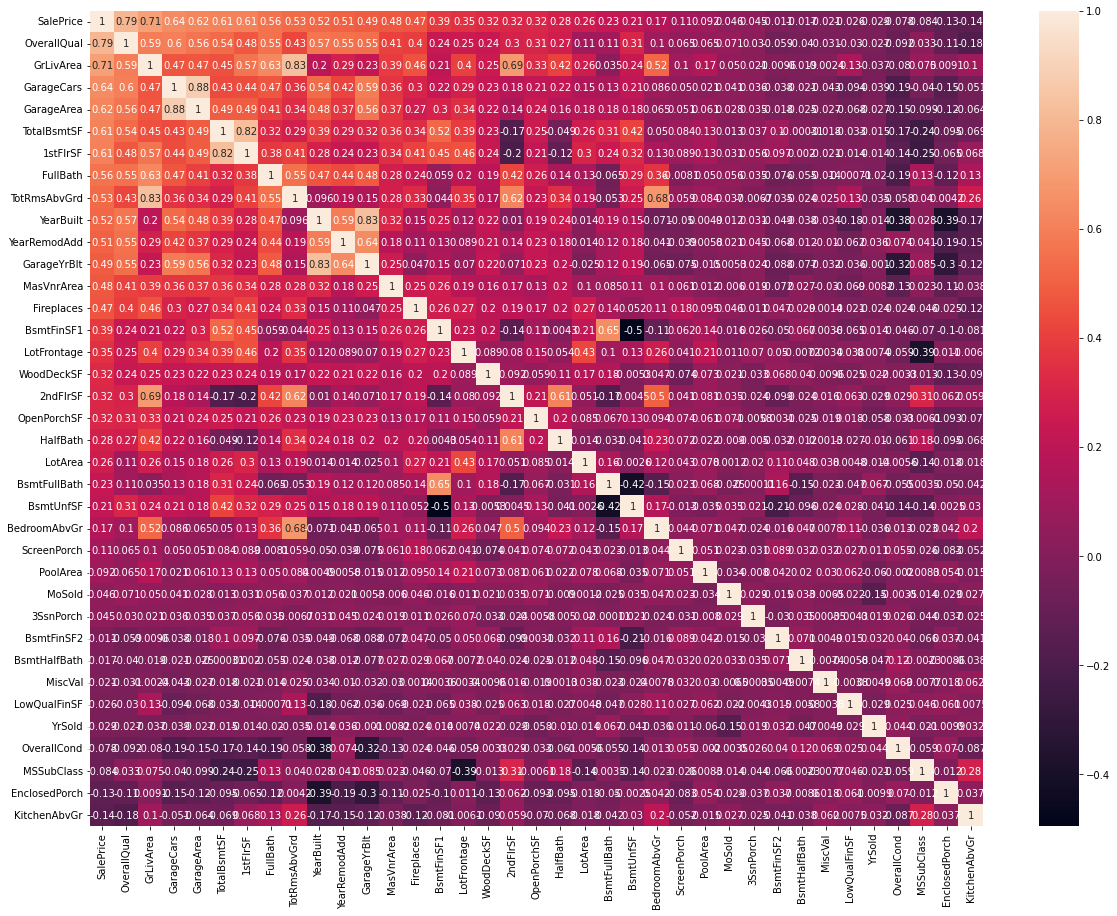

In [63]:
corr=data.corr()
top_corr=data[corr.nlargest(40,'SalePrice')['SalePrice'].index].corr() #nlargest(n, 'column', keep='first') : column에서 가장 큰것부터 n개 추출, 값이 같을 경우 위부터 추출
#keep='last' : 값이 같을 경우 아래부터 추출, ='all' : 값이 같을 경우 모두 추출
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

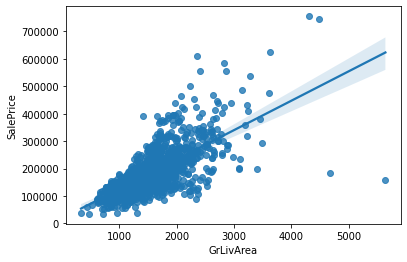

In [64]:
sns.regplot(data['GrLivArea'], data['SalePrice'])

In [65]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [66]:
Ytrain=train['SalePrice']
train=train[list(test)]
all_data=pd.concat((train, test), axis=0)
print(all_data.shape)
#SalePrice에 미리 log를 취해주었다
Ytrain=np.log(Ytrain+1)

(2917, 79)


In [67]:
cols=list(all_data)
for col in list(all_data):
  if (all_data[col].isnull().sum())==0:
    pass
  else:
    print(col, ' : ', all_data[col].isnull().sum())

MSZoning  :  4
LotFrontage  :  486
Alley  :  2719
Utilities  :  2
Exterior1st  :  1
Exterior2nd  :  1
MasVnrType  :  24
MasVnrArea  :  23
BsmtQual  :  81
BsmtCond  :  82
BsmtExposure  :  82
BsmtFinType1  :  79
BsmtFinSF1  :  1
BsmtFinType2  :  80
BsmtFinSF2  :  1
BsmtUnfSF  :  1
TotalBsmtSF  :  1
Electrical  :  1
BsmtFullBath  :  2
BsmtHalfBath  :  2
KitchenQual  :  1
Functional  :  2
FireplaceQu  :  1420
GarageType  :  157
GarageYrBlt  :  159
GarageFinish  :  159
GarageCars  :  1
GarageArea  :  1
GarageQual  :  159
GarageCond  :  159
PoolQC  :  2908
Fence  :  2346
MiscFeature  :  2812
SaleType  :  1


In [68]:
cols=list(all_data)
for col in list(all_data):
    if (all_data[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(len(cols), '\n', cols)

34 
 ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [69]:
len(cols)

34

In [70]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','LotFrontage'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [71]:
print(f"Total count of missing values in all_data : {all_data.isnull().sum().sum()}")

Total count of missing values in all_data : 0


In [72]:
import warnings; warnings.simplefilter('ignore')

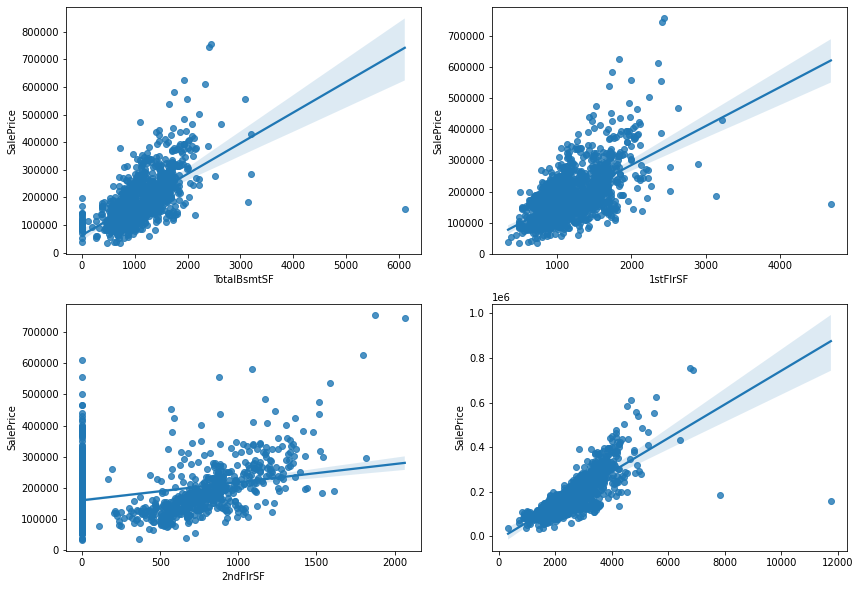

In [73]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.regplot(data['TotalBsmtSF'], data['SalePrice'], ax=ax1)
sns.regplot(data['1stFlrSF'], data['SalePrice'], ax=ax2)
sns.regplot(data['2ndFlrSF'], data['SalePrice'], ax=ax3)
sns.regplot(data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'], data['SalePrice'], ax=ax4)

In [74]:
#위 그래프를 보면 지하, 1층, 2층의 면적을 합친 '총면적'(오른쪽 아래 그래프)은 목적변수를 상당히 잘 나타낸다.
#총면적 항목을 추가하고, 2층없음, 지하실없음 항목을 추가함
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

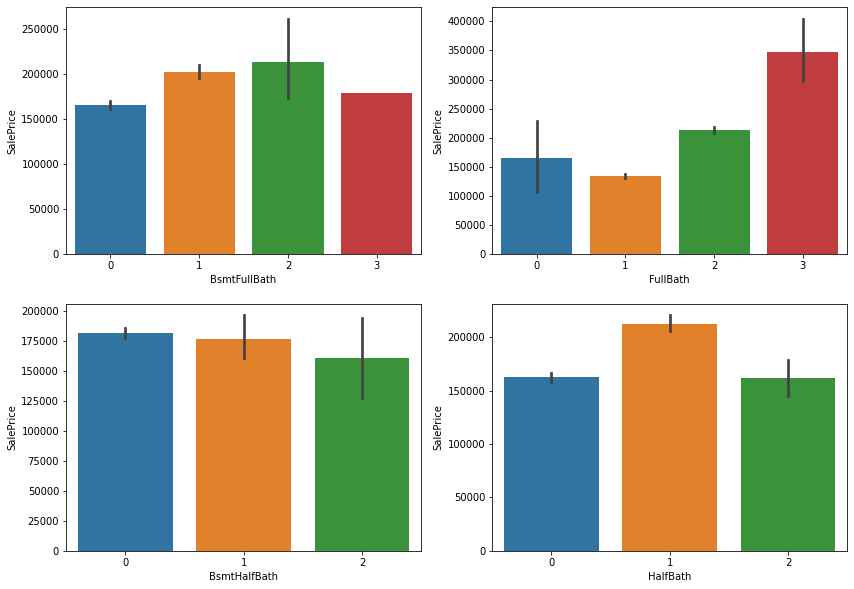

In [75]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.barplot(data['BsmtFullBath'], data['SalePrice'], ax=ax1)
sns.barplot(data['FullBath'], data['SalePrice'], ax=ax2)
sns.barplot(data['BsmtHalfBath'], data['SalePrice'], ax=ax3)
sns.barplot(data['HalfBath'], data['SalePrice'], ax=ax4)

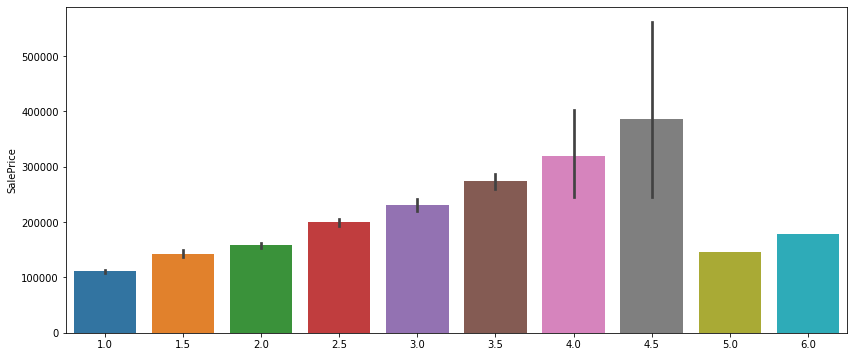

In [76]:
#위를 보면 화장실은 지하실에있는지, 목욕시설 포함인지에 따라 4항목으로 나뉘고 각각 난잡하다.
#목욕시설 미포함을 0.5, 포함을 1.0으로 잡고 다 합쳐보자 
figure, (ax5) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(14,6)
sns.barplot(data['BsmtFullBath'] + data['FullBath'] + (data['BsmtHalfBath']/2) + (data['HalfBath']/2), data['SalePrice'], ax=ax5)

In [77]:
#5.0, 6.0에선 그래프 끄트머리에 검은선이 안보이는데, 이는 편차가 없다는 것이고, 이는 데이터가 하나만 존재한다는 뜻.
#이상치로 판단할 수 있겠고, 제거하자.
all_data['TotalBath']=all_data['BsmtFullBath'] + all_data['FullBath'] + (all_data['BsmtHalfBath']/2) + (all_data['HalfBath']/2)

In [78]:
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

In [79]:
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)
all_data['YrSold']=all_data['YrSold'].astype(str)

In [80]:
#지하실 관련 항목을 싸그리 수정해주자
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt=all_data[Basement]

In [81]:
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

In [82]:
#지하실 완성도점수, 지하실 종합점수, 지하실 미완성 여부 항목을 만들었다.
Bsmt['BsmtScore']= Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore']=Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore']=Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

In [83]:
#토지 관련 항목도 축약
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)

all_data['LotScore']=Lot['LotScore']

In [84]:
#차고 관련 항목도 축약
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
all_data['NoGarage']=(all_data['GarageArea']==0)

In [85]:
Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish']) * (Garage['GarageQual']) * (Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']

In [86]:
#비정상적으로 하나의 값만 많은 변수들 삭제
all_data=all_data.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating'])

In [87]:
#비정상적으로 빈 값이 많은 변수들 삭제
all_data=all_data.drop(columns=['PoolArea','PoolQC'])
all_data=all_data.drop(columns=['MiscVal','MiscFeature'])

In [88]:
all_data['NoLowQual']=(all_data['LowQualFinSF']==0)
all_data['NoOpenPorch']=(all_data['OpenPorchSF']==0)
all_data['NoWoodDeck']=(all_data['WoodDeckSF']==0)

In [89]:
#범주형 데이터 모조리 일단 원핫인코딩 ㄱ
non_numeric=all_data.select_dtypes(np.object)

def onehot(col_list):
    global all_data
    while len(col_list) !=0:
        col=col_list.pop(0)
        data_encoded=pd.get_dummies(all_data[col], prefix=col)
        all_data=pd.merge(all_data, data_encoded, on='Id')
        all_data=all_data.drop(columns=col)
    print(all_data.shape)
    
onehot(list(non_numeric))

(2917, 309)


In [90]:
#수치형 데이터는 skewed가 크게 되어있는 것들만 log취해줌
numeric=all_data.select_dtypes(np.number)

def log_transform(col_list):
    transformed_col=[]
    while len(col_list)!=0:
        col=col_list.pop(0)
        if all_data[col].skew() > 0.5:
            all_data[col]=np.log(all_data[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f"{len(transformed_col)} features had been tranformed")
    print(all_data.shape)

log_transform(list(numeric))

255 features had been tranformed
(2917, 309)


In [91]:
print(train.shape, test.shape)
Xtrain=all_data[:len(train)]
Xtest=all_data[len(train):]
print(Xtrain.shape, Xtest.shape)

(1458, 79) (1459, 79)
(1458, 309) (1459, 309)


In [93]:
from scipy.stats import norm

In [95]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [97]:
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))

model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                         min_samples_split=10, loss='huber', random_state=18)

model_XGB=XGBRegressor(colsample_bylevel=0.9229733609038979,colsample_bynode=0.21481791874780318,colsample_bytree=0.607964318297635, 
                       gamma=0.8989889254961725, learning_rate=0.009192310189734834, max_depth=3, n_estimators=3602, 
                       reg_alpha=3.185674564163364e-12,reg_lambda=4.95553539265423e-13, seed=18, subsample=0.8381904293270576,
                       tree_method='gpu_hist',verbosity=0)

In [99]:
model_Lasso.fit(Xtrain, Ytrain)
Lasso_predictions=model_Lasso.predict(Xtest)
train_Lasso=model_Lasso.predict(Xtrain)

model_ENet.fit(Xtrain, Ytrain)
ENet_predictions=model_ENet.predict(Xtest)
train_ENet=model_ENet.predict(Xtrain)

model_GBoost.fit(Xtrain, Ytrain)
GBoost_predictions=model_GBoost.predict(Xtest)
train_GBoost=model_GBoost.predict(Xtrain)

log_train_predictions = (train_Lasso + train_ENet + train_GBoost)/3
train_score=np.sqrt(mean_squared_error(Ytrain, log_train_predictions))
print(f"Scoring with train data : {train_score}")

log_predictions=(Lasso_predictions + ENet_predictions + GBoost_predictions) / 3
predictions=np.exp(log_predictions)-1
submission['SalePrice']=predictions
submission.to_csv('Result.csv')

Scoring with train data : 0.07808835792510635
